In [1]:
import warnings
warnings.filterwarnings('ignore')
import Bio
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
count_dir = '../analysis/barcode_counts/'
selection_val_dir = '../analysis/selection_values/'

In [3]:
# Read csv with oligo designs into df
complete_rep_oligos_df = pd.read_csv('../library_design/20210325_aav2_rep_complete_oligo_seqs_tiles0-13.csv', index_col=0)
rep7868_lib_tiles = [0, 1, 2, 11, 12, 5, 6, 7, 8, 9, 10]
wt_tiles = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rep7868_rep_oligos_df = complete_rep_oligos_df.loc[complete_rep_oligos_df['tile_num'].isin(rep7868_lib_tiles)]
wt_oligos_df = complete_rep_oligos_df.loc[complete_rep_oligos_df['tile_num'].isin(wt_tiles)]
print (len(rep7868_rep_oligos_df.index))
rep7868_rep_oligos_df.head()

81116


,aa,abs_pos,barcode,chip_oligo,codon,enzymes_pre,enzymes_sites,is_wt,is_wt_aa,lib_type,mutant_check,mutant_seq,new_swap,pos,skppf,tile_num
0,*,1,TCTGAGTCTCACACTCACAG,CGCGTCGAGTAGGGTGGTCTCGCCGCCTAACCGGGGTTTTACGAGA...,TAA,[],[],0,0,sub,GCCGCCTAACCGGGG,GCCGCCTAACCGGGGTTTTACGAGATTGTGATTAAGGTCCCCAGCG...,GCCGCCTAACCGGGG,1,skpp15-2-F,0
1,*,1,ACTGAGAGAGTGACAGACTG,CGCGTCGAGTAGGGTGGTCTCGCCGCCTAACCGGGGTTTTACGAGA...,TAA,[],[],0,0,sub,GCCGCCTAACCGGGG,GCCGCCTAACCGGGGTTTTACGAGATTGTGATTAAGGTCCCCAGCG...,GCCGCCTAACCGGGG,1,skpp15-2-F,0
2,T,1,CAGACTGTGACACAGAGACT,CGCGTCGAGTAGGGTGGTCTCGCCGCCACACCGGGGTTTTACGAGA...,ACA,[],[],0,0,sub,GCCGCCACACCGGGG,GCCGCCACACCGGGGTTTTACGAGATTGTGATTAAGGTCCCCAGCG...,GCCGCCACACCGGGG,1,skpp15-2-F,0
3,T,1,GTCAGACAGTCACTGAGTGA,CGCGTCGAGTAGGGTGGTCTCGCCGCCACACCGGGGTTTTACGAGA...,ACA,[],[],0,0,sub,GCCGCCACACCGGGG,GCCGCCACACCGGGGTTTTACGAGATTGTGATTAAGGTCCCCAGCG...,GCCGCCACACCGGGG,1,skpp15-2-F,0
4,N,1,TCTGAGTCAGAGTGTGACTG,CGCGTCGAGTAGGGTGGTCTCGCCGCCAATCCGGGGTTTTACGAGA...,AAT,[],[],0,0,sub,GCCGCCAATCCGGGG,GCCGCCAATCCGGGGTTTTACGAGATTGTGATTAAGGTCCCCAGCG...,GCCGCCAATCCGGGG,1,skpp15-2-F,0


In [4]:
# Read plasmid library barcode counts for each library into df and merge with oligo design df
# This will drop any barcodes that were sequenced but not part of the library design
rep7868_plasmid_df = pd.read_csv(count_dir + 'rep7868_plasmid.csv', header=None)
rep7868_plasmid_df.columns = ['barcode', 'plasmid_count']
rep7868_plasmid_df = rep7868_plasmid_df.merge(rep7868_rep_oligos_df, how='inner', on='barcode')
rep7868_plasmid_df.drop(['chip_oligo', 'enzymes_pre', 'enzymes_sites', 'is_wt', 'is_wt_aa',
                         'mutant_check', 'mutant_seq', 'new_swap', 'pos', 'skppf', 'tile_num',
                         'abs_pos', 'aa', 'lib_type', 'codon'], axis=1, inplace=True)

wtaav2_plasmid_df = pd.read_csv(count_dir + 'wtaav2_plasmid.csv', header=None)
wtaav2_plasmid_df.columns = ['barcode', 'plasmid_count']
wtaav2_plasmid_df = wtaav2_plasmid_df.merge(wt_oligos_df, how='inner', on='barcode')
wtaav2_plasmid_df.drop(['chip_oligo', 'enzymes_pre', 'enzymes_sites', 'is_wt', 'is_wt_aa',
                         'mutant_check', 'mutant_seq', 'new_swap', 'pos', 'skppf', 'tile_num',
                         'abs_pos', 'aa', 'lib_type', 'codon'], axis=1, inplace=True)
wtaav2_plasmid_df.head()

,barcode,plasmid_count
0,TGAGTGAGAGACTGAGTCAG,197
1,GTCAGACAGTCAGTGTGTGA,238
2,ACTCAGTCTGAGTGTCACAC,523
3,ACAGAGACACTGACTCAGTG,104
4,GACTCAGTGTCTGTGTCTCT,256


In [5]:
def save_fig(fig, fig_name, directory, transparent=True):
    fig_path = os.path.join(directory, fig_name)
    fig.savefig(fig_path, bbox_inches='tight', dpi='figure',transparent=transparent)

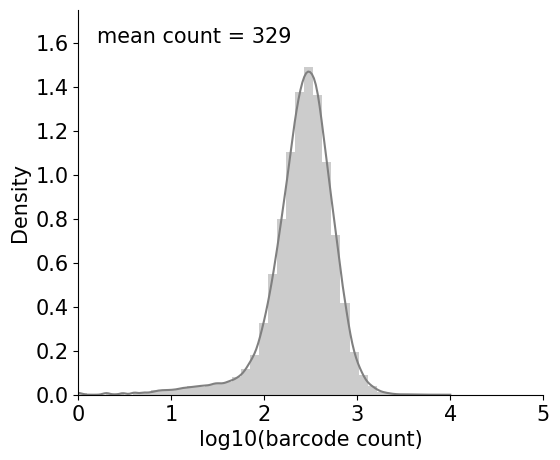

In [6]:
# generate density plot of barcode counts in rep7868 plasmid library
plt.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=(6, 5), linewidth=5)
ax = plt.axes()
ax.set_facecolor('white')
sns.distplot(a=rep7868_plasmid_df['plasmid_count'].apply(np.log10), bins=40, color='gray')
plt.ylabel('Density')
plt.xlabel('log10(barcode count)')
plt.text(0.2, 1.6, 'mean count = 329')
plt.ylim(0, 1.75)
plt.xlim(0,5)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig('../analysis/output_figures/rep7868_plasmid_bc_count_density_plot.png', bbox_inches=None)
plt.show()

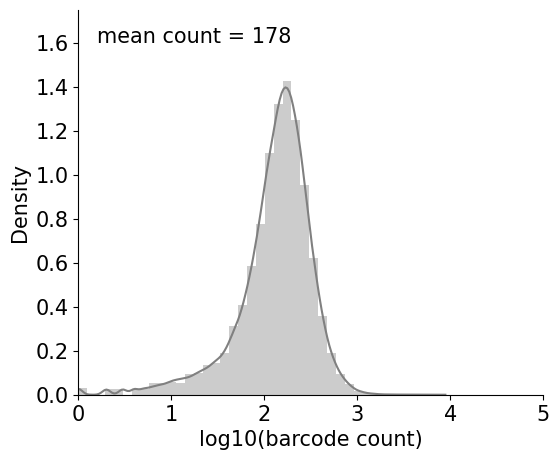

In [7]:
# generate density plot of barcode counts in wtaav2 plasmid library
plt.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=(6, 5), linewidth=5)
ax = plt.axes()
ax.set_facecolor('white')
sns.distplot(a=wtaav2_plasmid_df['plasmid_count'].apply(np.log10), bins=40, color='gray')
plt.ylabel('Density')
plt.xlabel('log10(barcode count)')
plt.text(0.2, 1.6, 'mean count = 178')
plt.ylim(0, 1.75)
plt.xlim(0,5)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig('../analysis/output_figures/wtaav2_plasmid_bc_count_density_plot.png', bbox_inches=None)
plt.show()

In [8]:
# Read in dfs with viral library bc counts, merge dfs with counts from replicate transfections,
# merge count dfs with oligo design dfs to drop any barcodes that were sequenced but not part of the library design
# drop unneccesary columns from resulting dfs and merge viral count df with plasmid count df
def read_trans_csv(trans_condition, viral_count_loc):
    trans_count_df_rep_a = pd.read_csv(viral_count_loc + trans_condition + '_transa.csv')
    trans_count_df_rep_a.columns = ['barcode', 'virus_replicate_a_count']
    trans_count_df_rep_b = pd.read_csv(viral_count_loc + trans_condition + '_transb.csv')
    trans_count_df_rep_b.columns = ['barcode', 'virus_replicate_b_count']
    
    trans_count_df = trans_count_df_rep_a.merge(trans_count_df_rep_b, how='inner', on='barcode')
    
    # select the correct oligo design and plasmid dfs
    if 'wt' in trans_condition:
        oligos_df = wt_oligos_df
        plasmid_df = wtaav2_plasmid_df
    else:
        oligos_df = rep7868_rep_oligos_df
        plasmid_df = rep7868_plasmid_df
    trans_count_trimmed_df = trans_count_df.merge(oligos_df, how='inner', on='barcode')
    
    trans_count_trimmed_df.drop(['chip_oligo', 'enzymes_pre', 'enzymes_sites', 'is_wt', 'is_wt_aa',
                                  'mutant_check', 'mutant_seq', 'new_swap', 'pos', 'skppf', 'tile_num',
                                  'abs_pos', 'aa', 'lib_type', 'codon'], axis=1, inplace=True)
    trans_count_trimmed_df.sort_index(inplace=True)
    
    all_counts_df = plasmid_df.merge(trans_count_trimmed_df, how='outer', on='barcode')
    return (all_counts_df)

In [9]:
rep7868_all_counts_df = read_trans_csv('rep7868_aav2_virus', count_dir)
rep7868_all_counts_df.head()

,barcode,plasmid_count,virus_replicate_a_count,virus_replicate_b_count
0,ACTCTCTCTCTCACACTCAC,592.0,258.0,252.0
1,ACAGTCACTCACTCTGTCAC,206.0,86.0,110.0
2,TGACTCAGAGTCACTCAGAG,442.0,332.0,108.0
3,ACAGTCACAGTGACTGAGTG,816.0,586.0,334.0
4,CTCACTCAGACACTGTGAGT,222.0,155.0,143.0


In [10]:
wtaav2_all_counts_df = read_trans_csv('wtaav2_virus', count_dir)
wtaav2_all_counts_df.head()

,barcode,plasmid_count,virus_replicate_a_count,virus_replicate_b_count
0,TGAGTGAGAGACTGAGTCAG,197.0,89.0,266.0
1,GTCAGACAGTCAGTGTGTGA,238.0,110.0,188.0
2,ACTCAGTCTGAGTGTCACAC,523.0,473.0,821.0
3,ACAGAGACACTGACTCAGTG,104.0,20.0,61.0
4,GACTCAGTGTCTGTGTCTCT,256.0,94.0,175.0


In [11]:
aav5_all_counts_df = read_trans_csv('rep7868_aav5_virus', count_dir)
aav5_all_counts_df.head()

,barcode,plasmid_count,virus_replicate_a_count,virus_replicate_b_count
0,ACTCTCTCTCTCACACTCAC,592.0,80.0,123.0
1,ACAGTCACTCACTCTGTCAC,206.0,31.0,20.0
2,TGACTCAGAGTCACTCAGAG,442.0,35.0,38.0
3,ACAGTCACAGTGACTGAGTG,816.0,128.0,103.0
4,CTCACTCAGACACTGTGAGT,222.0,40.0,55.0


In [12]:
aav9_all_counts_df = read_trans_csv('rep7868_aav9_virus', count_dir)
aav9_all_counts_df.head()

,barcode,plasmid_count,virus_replicate_a_count,virus_replicate_b_count
0,ACTCTCTCTCTCACACTCAC,592,88.0,58.0
1,ACAGTCACTCACTCTGTCAC,206,57.0,37.0
2,TGACTCAGAGTCACTCAGAG,442,54.0,69.0
3,ACAGTCACAGTGACTGAGTG,816,156.0,96.0
4,CTCACTCAGACACTGTGAGT,222,57.0,23.0


In [13]:
# Merge rep7868_all_counts df with library design df and create multiindexes for selection value calculation
rep7868_production_bc_df = pd.merge(rep7868_all_counts_df, rep7868_rep_oligos_df, how='inner', on='barcode')
rep7868_production_bc_df.drop(['chip_oligo', 'enzymes_pre', 'enzymes_sites', 'mutant_check', 'mutant_seq', 'new_swap', 'skppf', 'pos'],
                          axis=1, inplace=True)
rep7868_production_bc_df['aa-codon'] = rep7868_production_bc_df['aa'] + '-' + rep7868_production_bc_df['codon']
rep7868_production_bc_df.set_index(['abs_pos', 'tile_num', 'aa', 'is_wt_aa', 'is_wt', 'lib_type', 'codon', 'aa-codon',
                                    'barcode'], inplace=True)
rep7868_production_bc_df.sort_index(inplace=True)
rep7868_production_bc_df.head()

num_cols = range(3)
promoters = ['cmv' for s in num_cols]
num_plasmid_samples = 1
num_viral_samples = range(2)
source = ['plasmid'] + ['virus' for v in num_viral_samples]
rep5240_promoter = ['na', 'p15', 'p15']
wt_plasmid_amt = ['na', '1', '1']
trans_rep = ['na', 'virus', 'virus']
virus_rep = ['na', 'a', 'b']
measurement = ['count' for c in num_cols]
header = [promoters, source, rep5240_promoter, wt_plasmid_amt, trans_rep, virus_rep, measurement]
rep7868_production_bc_df.columns = pd.MultiIndex.from_arrays(header)
rep7868_production_bc_df.head()

cmv  \
                                                                                plasmid   
                                                                                     na   
                                                                                     na   
                                                                                     na   
                                                                                     na   
                                                                                  count   
abs_pos tile_num aa is_wt_aa is_wt lib_type codon aa-codon barcode                        
1       0        *  0        0     del      TAA   *-TAA    GTGAGACTGACACACTGTCT   258.0   
                                                           TCAGACTCTGACTGAGACAG   230.0   
                                   sub      TAA   *-TAA    ACTGAGAGAGTGACAGACTG   239.0   
                                                           TCTGAGTCTCACACTCACAG   162.0   
                                            TAG   *-TAG    GACACTCAGAGAGACTGAGT    86.0   

                                                                                        \
                                                                                 virus   
                                                                                   p15   
                                                                                     1   
                                                                                 virus   
                                                                                     a   
                                                                                 count   
abs_pos tile_num aa is_wt_aa is_wt lib_type codon aa-codon barcode                       
1       0        *  0        0     del      TAA   *-TAA    GTGAGACTGACACACTGTCT  163.0   
                                                           TCAGACTCTGACTGAGACAG  286.0   
                                   sub      TAA   *-TAA    ACTGAGAGAGTGACAGACTG  195.0   
                                                           TCTGAGTCTCACACTCACAG  108.0   
                                            TAG   *-TAG    GACACTCAGAGAGACTGAGT   51.0   

                                                                                        
                                                                                        
                                                                                        
                                                                                        
                                                                                        
                                                                                     b  
                                                                                 count  
abs_pos tile_num aa is_wt_aa is_wt lib_type codon aa-codon barcode                      
1       0        *  0        0     del      TAA   *-TAA    GTGAGACTGACACACTGTCT   85.0  
                                                           TCAGACTCTGACTGAGACAG  172.0  
                                   sub      TAA   *-TAA    ACTGAGAGAGTGACAGACTG   63.0  
                                                           TCTGAGTCTCACACTCACAG   91.0  
                                            TAG   *-TAG    GACACTCAGAGAGACTGAGT   19.0

In [14]:
# Merge wtaav2_all_counts df with library design df and create multiindexes for selection value calculation
wtaav2_production_bc_df = pd.merge(wtaav2_all_counts_df, wt_oligos_df, how='inner', on='barcode')
wtaav2_production_bc_df.drop(['chip_oligo', 'enzymes_pre', 'enzymes_sites', 'mutant_check', 'mutant_seq', 'new_swap', 'skppf', 'pos'],
                          axis=1, inplace=True)
wtaav2_production_bc_df['aa-codon'] = wtaav2_production_bc_df['aa'] + '-' + wtaav2_production_bc_df['codon']
wtaav2_production_bc_df.set_index(['abs_pos', 'tile_num', 'aa', 'is_wt_aa', 'is_wt', 'lib_type', 'codon', 'aa-codon',
                                    'barcode'], inplace=True)
wtaav2_production_bc_df.sort_index(inplace=True)
wtaav2_production_bc_df.head()

num_cols = range(3)
promoters = ['p5' for s in num_cols]
num_plasmid_samples = 1
num_viral_samples = range(2)
source = ['plasmid'] + ['virus' for v in num_viral_samples]
rep5240_promoter = ['na', 'na', 'na']
wt_plasmid_amt = ['na', 'na', 'na']
trans_rep = ['na', 'virus', 'virus']
virus_rep = ['na', 'a', 'b']
measurement = ['count' for c in num_cols]
header = [promoters, source, rep5240_promoter, wt_plasmid_amt, trans_rep, virus_rep, measurement]
wtaav2_production_bc_df.columns = pd.MultiIndex.from_arrays(header)
wtaav2_production_bc_df.head()

p5  \
                                                                                plasmid   
                                                                                     na   
                                                                                     na   
                                                                                     na   
                                                                                     na   
                                                                                  count   
abs_pos tile_num aa is_wt_aa is_wt lib_type codon aa-codon barcode                        
1       0        *  0        0     del      TAA   *-TAA    GTGAGACTGACACACTGTCT   137.0   
                                                           TCAGACTCTGACTGAGACAG    10.0   
                                   sub      TAA   *-TAA    ACTGAGAGAGTGACAGACTG    84.0   
                                                           TCTGAGTCTCACACTCACAG    24.0   
                                            TAG   *-TAG    GACACTCAGAGAGACTGAGT    42.0   

                                                                                        \
                                                                                 virus   
                                                                                    na   
                                                                                    na   
                                                                                 virus   
                                                                                     a   
                                                                                 count   
abs_pos tile_num aa is_wt_aa is_wt lib_type codon aa-codon barcode                       
1       0        *  0        0     del      TAA   *-TAA    GTGAGACTGACACACTGTCT  109.0   
                                                           TCAGACTCTGACTGAGACAG    7.0   
                                   sub      TAA   *-TAA    ACTGAGAGAGTGACAGACTG   77.0   
                                                           TCTGAGTCTCACACTCACAG   12.0   
                                            TAG   *-TAG    GACACTCAGAGAGACTGAGT   11.0   

                                                                                        
                                                                                        
                                                                                        
                                                                                        
                                                                                        
                                                                                     b  
                                                                                 count  
abs_pos tile_num aa is_wt_aa is_wt lib_type codon aa-codon barcode                      
1       0        *  0        0     del      TAA   *-TAA    GTGAGACTGACACACTGTCT  175.0  
                                                           TCAGACTCTGACTGAGACAG    6.0  
                                   sub      TAA   *-TAA    ACTGAGAGAGTGACAGACTG  113.0  
                                                           TCTGAGTCTCACACTCACAG   23.0  
                                            TAG   *-TAG    GACACTCAGAGAGACTGAGT   42.0

In [15]:
# Merge aav5_all_counts df with library design df and create multiindexes for selection value calculation
aav5_production_bc_df = pd.merge(aav5_all_counts_df, rep7868_rep_oligos_df, how='inner', on='barcode')
aav5_production_bc_df.drop(['chip_oligo', 'enzymes_pre', 'enzymes_sites', 'mutant_check', 'mutant_seq', 'new_swap', 'skppf', 'pos'],
                          axis=1, inplace=True)
aav5_production_bc_df['aa-codon'] = aav5_production_bc_df['aa'] + '-' + aav5_production_bc_df['codon']
aav5_production_bc_df.set_index(['abs_pos', 'tile_num', 'aa', 'is_wt_aa', 'is_wt', 'lib_type', 'codon', 'aa-codon',
                                    'barcode'], inplace=True)
aav5_production_bc_df.sort_index(inplace=True)
aav5_production_bc_df.head()

num_cols = range(3)
promoters = ['cmv' for s in num_cols]
num_plasmid_samples = 1
num_viral_samples = range(2)
source = ['plasmid'] + ['virus' for v in num_viral_samples]
rep5240_promoter = ['na', 'p15', 'p15']
wt_plasmid_amt = ['na', '1', '1']
trans_rep = ['na', 'virus', 'virus']
virus_rep = ['na', 'a', 'b']
measurement = ['count' for c in num_cols]
header = [promoters, source, rep5240_promoter, wt_plasmid_amt, trans_rep, virus_rep, measurement]
aav5_production_bc_df.columns = pd.MultiIndex.from_arrays(header)
aav5_production_bc_df.head()

cmv  \
                                                                                plasmid   
                                                                                     na   
                                                                                     na   
                                                                                     na   
                                                                                     na   
                                                                                  count   
abs_pos tile_num aa is_wt_aa is_wt lib_type codon aa-codon barcode                        
1       0        *  0        0     del      TAA   *-TAA    GTGAGACTGACACACTGTCT   258.0   
                                                           TCAGACTCTGACTGAGACAG   230.0   
                                   sub      TAA   *-TAA    ACTGAGAGAGTGACAGACTG   239.0   
                                                           TCTGAGTCTCACACTCACAG   162.0   
                                            TAG   *-TAG    GACACTCAGAGAGACTGAGT    86.0   

                                                                                       \
                                                                                virus   
                                                                                  p15   
                                                                                    1   
                                                                                virus   
                                                                                    a   
                                                                                count   
abs_pos tile_num aa is_wt_aa is_wt lib_type codon aa-codon barcode                      
1       0        *  0        0     del      TAA   *-TAA    GTGAGACTGACACACTGTCT  30.0   
                                                           TCAGACTCTGACTGAGACAG  20.0   
                                   sub      TAA   *-TAA    ACTGAGAGAGTGACAGACTG  34.0   
                                                           TCTGAGTCTCACACTCACAG  55.0   
                                            TAG   *-TAG    GACACTCAGAGAGACTGAGT   4.0   

                                                                                       
                                                                                       
                                                                                       
                                                                                       
                                                                                       
                                                                                    b  
                                                                                count  
abs_pos tile_num aa is_wt_aa is_wt lib_type codon aa-codon barcode                     
1       0        *  0        0     del      TAA   *-TAA    GTGAGACTGACACACTGTCT  70.0  
                                                           TCAGACTCTGACTGAGACAG  37.0  
                                   sub      TAA   *-TAA    ACTGAGAGAGTGACAGACTG  49.0  
                                                           TCTGAGTCTCACACTCACAG  35.0  
                                            TAG   *-TAG    GACACTCAGAGAGACTGAGT   4.0

In [16]:
# Merge aav9_all_counts df with library design df and create multiindexes for selection value calculation
aav9_production_bc_df = pd.merge(aav9_all_counts_df, rep7868_rep_oligos_df, how='inner', on='barcode')
aav9_production_bc_df.drop(['chip_oligo', 'enzymes_pre', 'enzymes_sites', 'mutant_check', 'mutant_seq', 'new_swap', 'skppf', 'pos'],
                          axis=1, inplace=True)
aav9_production_bc_df['aa-codon'] = aav9_production_bc_df['aa'] + '-' + aav9_production_bc_df['codon']
aav9_production_bc_df.set_index(['abs_pos', 'tile_num', 'aa', 'is_wt_aa', 'is_wt', 'lib_type', 'codon', 'aa-codon',
                                    'barcode'], inplace=True)
aav9_production_bc_df.sort_index(inplace=True)
aav9_production_bc_df.head()

num_cols = range(3)
promoters = ['cmv' for s in num_cols]
num_plasmid_samples = 1
num_viral_samples = range(2)
source = ['plasmid'] + ['virus' for v in num_viral_samples]
rep5240_promoter = ['na', 'p15', 'p15']
wt_plasmid_amt = ['na', '1', '1']
trans_rep = ['na', 'virus', 'virus']
virus_rep = ['na', 'a', 'b']
measurement = ['count' for c in num_cols]
header = [promoters, source, rep5240_promoter, wt_plasmid_amt, trans_rep, virus_rep, measurement]
aav9_production_bc_df.columns = pd.MultiIndex.from_arrays(header)
aav9_production_bc_df.head()

cmv  \
                                                                                plasmid   
                                                                                     na   
                                                                                     na   
                                                                                     na   
                                                                                     na   
                                                                                  count   
abs_pos tile_num aa is_wt_aa is_wt lib_type codon aa-codon barcode                        
1       0        *  0        0     del      TAA   *-TAA    GTGAGACTGACACACTGTCT     258   
                                                           TCAGACTCTGACTGAGACAG     230   
                                   sub      TAA   *-TAA    ACTGAGAGAGTGACAGACTG     239   
                                                           TCTGAGTCTCACACTCACAG     162   
                                            TAG   *-TAG    GACACTCAGAGAGACTGAGT      86   

                                                                                       \
                                                                                virus   
                                                                                  p15   
                                                                                    1   
                                                                                virus   
                                                                                    a   
                                                                                count   
abs_pos tile_num aa is_wt_aa is_wt lib_type codon aa-codon barcode                      
1       0        *  0        0     del      TAA   *-TAA    GTGAGACTGACACACTGTCT  30.0   
                                                           TCAGACTCTGACTGAGACAG  43.0   
                                   sub      TAA   *-TAA    ACTGAGAGAGTGACAGACTG  36.0   
                                                           TCTGAGTCTCACACTCACAG  49.0   
                                            TAG   *-TAG    GACACTCAGAGAGACTGAGT  30.0   

                                                                                       
                                                                                       
                                                                                       
                                                                                       
                                                                                       
                                                                                    b  
                                                                                count  
abs_pos tile_num aa is_wt_aa is_wt lib_type codon aa-codon barcode                     
1       0        *  0        0     del      TAA   *-TAA    GTGAGACTGACACACTGTCT  27.0  
                                                           TCAGACTCTGACTGAGACAG  11.0  
                                   sub      TAA   *-TAA    ACTGAGAGAGTGACAGACTG  46.0  
                                                           TCTGAGTCTCACACTCACAG  33.0  
                                            TAG   *-TAG    GACACTCAGAGAGACTGAGT  10.0

In [17]:
# Takes production df and returns same size df but with selection values
# df_in - this is production df 
# level - either 'barcode', 'codon', or 'aa', chooses where to sum counts
# wt_norm - if True selection values are normalized to internal wt controls
# sum_level - if pcr selection values are calculated separately for each transfection,
#             if trans selection values are calculated after summing barcode counts across transfection replicates

def compute_selection(df_in, level='barcode', wt_norm=True, sum_level='pcr'):
    if level == 'aa':
        wt = 'is_wt_aa'
        index = ['abs_pos', 'aa', 'is_wt_aa', 'lib_type']
    if level =='codon':
        wt = 'is_wt'
        index = ['abs_pos', 'aa', 'codon', 'aa-codon', 'lib_type', 'is_wt']
    if level == 'barcode':
        wt = 'is_wt'
        index = ['abs_pos', 'aa', 'codon', 'lib_type', 'barcode', 'is_wt']

    df_in_g = df_in.groupby(level=index).sum()

    idx = pd.IndexSlice

    df = pd.DataFrame(index=df_in_g.index)
    
    for col in df_in_g.loc[:,idx[:,'plasmid',:]]:
        promoter =  col[0]
        lib = col[2]
    
    # calculate frequency of each bc in plasmid library, summing across pcr replicates
    total_bc_counts_plasmid = df_in_g.loc[:,idx[:,'plasmid',:]].sum(axis=1)
    freq_p = total_bc_counts_plasmid/total_bc_counts_plasmid.sum()

    # calculate frequency of each bc in viral library - sum pcr or transfection replicates as indicated
    if sum_level == 'pcr':
        count_v = pd.DataFrame(df_in_g.loc[:,idx[:,'virus',:,:]]).groupby(level=5, axis=1).sum()
        freq_v = count_v.apply(lambda x: x/np.nansum(x))
    elif sum_level == 'transfection':
        count_v = pd.DataFrame(df_in_g.loc[:,idx[:,'virus',:,:]]).groupby(level=4, axis=1).sum()
        freq_v = count_v.apply(lambda x: x/np.nansum(x))


    # calculate selection values as frequency in the viral library / frequency in plasmid library
    selection = freq_v.div(freq_p, axis=0)
        
    if wt_norm:
        norm_df = selection.xs(1, level=wt)
        norm_df = norm_df.replace([np.inf, -np.inf], np.nan)
        norm_df = norm_df.dropna()
        df = selection / norm_df.mean()
    
    return (df)

In [18]:
# Calculate selection values for rep78/68 library (aav2 capsid) for each transfection replicate
rep7868_selection_aa_df = compute_selection(rep7868_production_bc_df, level='aa', wt_norm=True, sum_level='pcr')
rep7868_selection_aa_df.to_csv(selection_val_dir + 'rep7868_selection_values_aa.csv')
rep7868_selection_codon_df = compute_selection(rep7868_production_bc_df, level='codon', wt_norm=True, sum_level='pcr')
rep7868_selection_codon_df.to_csv(selection_val_dir + 'rep7868_selection_values_codon.csv')
rep7868_selection_barcode_df = compute_selection(rep7868_production_bc_df, level='barcode', wt_norm=True, sum_level='pcr')
rep7868_selection_barcode_df.to_csv(selection_val_dir + 'rep7868_selection_values_barcode.csv')
rep7868_selection_barcode_df.head()

a         b
abs_pos aa codon lib_type barcode              is_wt                    
1       *  TAA   del      GTGAGACTGACACACTGTCT 0      0.471768  0.289412
                          TCAGACTCTGACTGAGACAG 0      0.928537  0.656928
                 sub      ACTGAGAGAGTGACAGACTG 0      0.609253  0.231558
                          TCTGAGTCTCACACTCACAG 0      0.497817  0.493451
           TAG   sub      GACACTCAGAGAGACTGAGT 0      0.442826  0.194076

In [54]:
# Calculate selection values for rep78/68 library (aav2 capsid), summing barcode counts across transfection replicates
rep7868_selection_aa_trans_df = compute_selection(rep7868_production_bc_df, level='aa', wt_norm=True, sum_level='transfection')
rep7868_selection_aa_trans_df.to_csv(selection_val_dir + 'rep7868_selection_values_aa_trans.csv')
rep7868_selection_codon_trans_df = compute_selection(rep7868_production_bc_df, level='codon', wt_norm=True, sum_level='transfection')
rep7868_selection_codon_trans_df.to_csv(selection_val_dir + 'rep7868_selection_values_codon_trans.csv')
rep7868_selection_barcode_trans_df = compute_selection(rep7868_production_bc_df, level='barcode', wt_norm=True, sum_level='transfection')
rep7868_selection_barcode_trans_df.to_csv(selection_val_dir + 'rep7868_selection_values_barcode_trans.csv')
rep7868_selection_barcode_trans_df.head()

virus
abs_pos aa codon lib_type barcode              is_wt          
1       *  TAA   del      GTGAGACTGACACACTGTCT 0      0.387980
                          TCAGACTCTGACTGAGACAG 0      0.803740
                 sub      ACTGAGAGAGTGACAGACTG 0      0.435712
                          TCTGAGTCTCACACTCACAG 0      0.495811
           TAG   sub      GACACTCAGAGAGACTGAGT 0      0.328532

In [55]:
# Calculate selection values for wtaav2 library for each transfection replicate
wtaav2_selection_aa_df = compute_selection(wtaav2_production_bc_df, level='aa', wt_norm=True, sum_level='pcr')
wtaav2_selection_aa_df.to_csv(selection_val_dir + 'wtaav2_selection_values_aa.csv')
wtaav2_selection_codon_df = compute_selection(wtaav2_production_bc_df, level='codon', wt_norm=True, sum_level='pcr')
wtaav2_selection_codon_df.to_csv(selection_val_dir + 'wtaav2_selection_values_codon.csv')
wtaav2_selection_barcode_df = compute_selection(wtaav2_production_bc_df, level='barcode', wt_norm=True, sum_level='pcr')
wtaav2_selection_barcode_df.to_csv(selection_val_dir + 'wtaav2_selection_values_barcode.csv')
wtaav2_selection_barcode_df.head()

a         b
abs_pos aa codon lib_type barcode              is_wt                    
1       *  TAA   del      GTGAGACTGACACACTGTCT 0      1.049374  0.803509
                          TCAGACTCTGACTGAGACAG 0      0.923257  0.377420
                 sub      ACTGAGAGAGTGACAGACTG 0      1.209026  0.846199
                          TCTGAGTCTCACACTCACAG 0      0.659469  0.602823
           TAG   sub      GACACTCAGAGAGACTGAGT 0      0.345436  0.629033

In [56]:
# Calculate selection values for wtaav2 library, summing barcode counts across transfection replicates
wtaav2_selection_aa_trans_df = compute_selection(wtaav2_production_bc_df, level='aa', wt_norm=True, sum_level='transfection')
wtaav2_selection_aa_trans_df.to_csv(selection_val_dir + 'wtaav2_selection_values_aa_trans.csv')
wtaav2_selection_codon_trans_df = compute_selection(wtaav2_production_bc_df, level='codon', wt_norm=True, sum_level='transfection')
wtaav2_selection_codon_trans_df.to_csv(selection_val_dir + 'wtaav2_selection_values_codon_trans.csv')
wtaav2_selection_barcode_trans_df = compute_selection(wtaav2_production_bc_df, level='barcode', wt_norm=True, sum_level='transfection')
wtaav2_selection_barcode_trans_df.to_csv(selection_val_dir + 'wtaav2_selection_values_barcode_trans.csv')
wtaav2_selection_barcode_trans_df.head()

virus
abs_pos aa codon lib_type barcode              is_wt          
1       *  TAA   del      GTGAGACTGACACACTGTCT 0      0.882903
                          TCAGACTCTGACTGAGACAG 0      0.553680
                 sub      ACTGAGAGAGTGACAGACTG 0      0.963362
                          TCTGAGTCTCACACTCACAG 0      0.621115
           TAG   sub      GACACTCAGAGAGACTGAGT 0      0.537455

In [57]:
# Calculate selection values for aav5 capsid experiment for each transfection replicate
aav5_selection_aa_df = compute_selection(aav5_production_bc_df, level='aa', wt_norm=True, sum_level='pcr')
aav5_selection_aa_df.to_csv(selection_val_dir + 'aav5_selection_values_aa.csv')
aav5_selection_codon_df = compute_selection(aav5_production_bc_df, level='codon', wt_norm=True, sum_level='pcr')
aav5_selection_codon_df.to_csv(selection_val_dir + 'aav5_selection_values_codon.csv')
aav5_selection_barcode_df = compute_selection(aav5_production_bc_df, level='barcode', wt_norm=True, sum_level='pcr')
aav5_selection_barcode_df.to_csv(selection_val_dir + 'aav5_selection_values_barcode.csv')
aav5_selection_barcode_df.head()

a         b
abs_pos aa codon lib_type barcode              is_wt                    
1       *  TAA   del      GTGAGACTGACACACTGTCT 0      0.558653  1.240733
                          TCAGACTCTGACTGAGACAG 0      0.417775  0.735654
                 sub      ACTGAGAGAGTGACAGACTG 0      0.683473  0.937558
                          TCTGAGTCTCACACTCACAG 0      1.631128  0.987991
           TAG   sub      GACACTCAGAGAGACTGAGT 0      0.223461  0.212697

In [58]:
# Calculate selection values for aav5 capsid experiment, summing barcode counts across transfection replicates
aav5_selection_aa_trans_df = compute_selection(aav5_production_bc_df, level='aa', wt_norm=True, sum_level='transfection')
aav5_selection_aa_trans_df.to_csv(selection_val_dir + 'aav5_selection_values_aa_trans.csv')
aav5_selection_codon_trans_df = compute_selection(aav5_production_bc_df, level='codon', wt_norm=True, sum_level='transfection')
aav5_selection_codon_trans_df.to_csv(selection_val_dir + 'aav5_selection_values_codon_trans.csv')
aav5_selection_barcode_trans_df = compute_selection(aav5_production_bc_df, level='barcode', wt_norm=True, sum_level='transfection')
aav5_selection_barcode_trans_df.to_csv(selection_val_dir + 'aav5_selection_values_barcode_trans.csv')
aav5_selection_barcode_trans_df.head()

virus
abs_pos aa codon lib_type barcode              is_wt          
1       *  TAA   del      GTGAGACTGACACACTGTCT 0      0.908109
                          TCAGACTCTGACTGAGACAG 0      0.580637
                 sub      ACTGAGAGAGTGACAGACTG 0      0.813651
                          TCTGAGTCTCACACTCACAG 0      1.301624
           TAG   sub      GACACTCAGAGAGACTGAGT 0      0.217946

In [59]:
# Calculate selection values for aav9 capsid experiment for each transfection replicate
aav9_selection_aa_df = compute_selection(aav9_production_bc_df, level='aa', wt_norm=True, sum_level='pcr')
aav9_selection_aa_df.to_csv(selection_val_dir + 'aav9_selection_values_aa.csv')
aav9_selection_codon_df = compute_selection(aav9_production_bc_df, level='codon', wt_norm=True, sum_level='pcr')
aav9_selection_codon_df.to_csv(selection_val_dir + 'aav9_selection_values_codon.csv')
aav9_selection_barcode_df = compute_selection(aav9_production_bc_df, level='barcode', wt_norm=True, sum_level='pcr')
aav9_selection_barcode_df.to_csv(selection_val_dir + 'aav9_selection_values_barcode.csv')
aav9_selection_barcode_df.head()

a         b
abs_pos aa codon lib_type barcode              is_wt                    
1       *  TAA   del      GTGAGACTGACACACTGTCT 0      0.465318  0.462225
                          TCAGACTCTGACTGAGACAG 0      0.748150  0.211239
                 sub      ACTGAGAGAGTGACAGACTG 0      0.602771  0.850098
                          TCTGAGTCTCACACTCACAG 0      1.210401  0.899722
           TAG   sub      GACACTCAGAGAGACTGAGT 0      1.395953  0.513583

In [60]:
# Calculate selection values for aav9 capsid experiment, summing barcode counts across transfection replicates
aav9_selection_aa_trans_df = compute_selection(aav9_production_bc_df, level='aa', wt_norm=True, sum_level='transfection')
aav9_selection_aa_trans_df.to_csv(selection_val_dir + 'aav9_selection_values_aa_trans.csv')
aav9_selection_codon_trans_df = compute_selection(aav9_production_bc_df, level='codon', wt_norm=True, sum_level='transfection')
aav9_selection_codon_trans_df.to_csv(selection_val_dir + 'aav9_selection_values_codon_trans.csv')
aav9_selection_barcode_trans_df = compute_selection(aav9_production_bc_df, level='barcode', wt_norm=True, sum_level='transfection')
aav9_selection_barcode_trans_df.to_csv(selection_val_dir + 'aav9_selection_values_barcode_trans.csv')
aav9_selection_barcode_trans_df.head()

virus
abs_pos aa codon lib_type barcode              is_wt          
1       *  TAA   del      GTGAGACTGACACACTGTCT 0      0.463848
                          TCAGACTCTGACTGAGACAG 0      0.492931
                 sub      ACTGAGAGAGTGACAGACTG 0      0.720338
                          TCTGAGTCTCACACTCACAG 0      1.062720
           TAG   sub      GACACTCAGAGAGACTGAGT 0      0.976521